# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [51]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

import openweathermapy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [52]:
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=lat_range[0], high=lat_range[1], size=1500)
lngs = np.random.uniform(low=lng_range[0], high=lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city by passing lat and lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # append unique city to the list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print("There are {} cities found from random geo-coordinates.".format(len(cities)))

There are 639 cities found from random geo-coordinates.


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [54]:
unit = "Imperial"

#api_key = "enter api key to execute"

base_url = f"http://api.openweathermap.org/data/2.5/weather?"
param = {"appid" : api_key,
         "units" : unit}

# Create DataFrame with below parameters
city_weather_df = pd.DataFrame(columns=["City",
                                        "Cloudiness(%)",
                                        "Country",
                                        "Date",
                                        "Humidity(%)",
                                        "Lat",
                                        "Lng", 
                                        "Max Temp(F)",
                                        "Wind Speed(mph)"])

# get local current time
def current_date():
    localtime = time.asctime( time.localtime(time.time()) )
    return localtime.split(' ')[1]+"/"+localtime.split(' ')[2]+"/"+localtime.split(' ')[4]


print("Beginning Data Retrieval")
print("-----------------------------------")


# store each city weather information on DataFrame
i = 0
not_found = 0
for city in cities:
    param["q"] = city
    
    # Perform a weather check on each of the cities using a series of successive API calls    
    data = requests.get(base_url, params=param).json()
    try:
        city_weather_df.loc[i, "City"] = data["name"]
        city_weather_df.loc[i, "Cloudiness(%)"] = data["clouds"]["all"]
        city_weather_df.loc[i, "Country"] = data["sys"]["country"]
        city_weather_df.loc[i, "Date"] = current_date()
        city_weather_df.loc[i, "Humidity(%)"] = data["main"]["humidity"]
        city_weather_df.loc[i, "Lat"] = data["coord"]["lat"]
        city_weather_df.loc[i, "Lng"] = data["coord"]["lon"]
        city_weather_df.loc[i, "Max Temp(F)"] = data["main"]["temp_max"]
        city_weather_df.loc[i, "Wind Speed(mph)"] = data["wind"]["speed"]
        
        i += 1
        # Include a print log of each city as it's being processed with the city number and city name.
        print("Processing Record {:3d} of set {} | {} ".format(i, len(cities), data['name']))
              
    except KeyError:
        print("(Total {} cities out of {} not found...) ".format(not_found + 1, len(cities)))
        not_found += 1

print(f"""
-------------------------------------------
Data Retrieval Completed
-------------------------------------------""")

Beginning Data Retrieval
-----------------------------------
Processing Record   1 of set 639 | Arraial do Cabo 
Processing Record   2 of set 639 | Mehamn 
Processing Record   3 of set 639 | Inirida 
Processing Record   4 of set 639 | Lichuan 
Processing Record   5 of set 639 | Punta Arenas 
(Total 1 cities out of 639 not found...) 
Processing Record   6 of set 639 | Vanimo 
Processing Record   7 of set 639 | Kushima 
Processing Record   8 of set 639 | Cape Town 
(Total 2 cities out of 639 not found...) 
Processing Record   9 of set 639 | Hermanus 
Processing Record  10 of set 639 | Arman 
Processing Record  11 of set 639 | Port Elizabeth 
Processing Record  12 of set 639 | Vaini 
Processing Record  13 of set 639 | Nelson Bay 
Processing Record  14 of set 639 | Morris 
Processing Record  15 of set 639 | Uglich 
Processing Record  16 of set 639 | Hilo 
Processing Record  17 of set 639 | Port Alfred 
Processing Record  18 of set 639 | Toora-Khem 
Processing Record  19 of set 639 | Dikson

Processing Record 163 of set 639 | Eureka 
Processing Record 164 of set 639 | Natubleng 
Processing Record 165 of set 639 | Iqaluit 
(Total 22 cities out of 639 not found...) 
Processing Record 166 of set 639 | Portland 
Processing Record 167 of set 639 | Ayagoz 
Processing Record 168 of set 639 | Saskylakh 
Processing Record 169 of set 639 | Santa catarina de Tepehuanes 
Processing Record 170 of set 639 | Hithadhoo 
Processing Record 171 of set 639 | Isla Vista 
Processing Record 172 of set 639 | Goderich 
Processing Record 173 of set 639 | Taltal 
Processing Record 174 of set 639 | Nekhayevskiy 
Processing Record 175 of set 639 | Malko Tarnovo 
Processing Record 176 of set 639 | Antalaha 
Processing Record 177 of set 639 | Santa Cruz de la Palma 
(Total 23 cities out of 639 not found...) 
Processing Record 178 of set 639 | Port Blair 
Processing Record 179 of set 639 | Adzope 
Processing Record 180 of set 639 | Shieli 
Processing Record 181 of set 639 | Vila Velha 
Processing Record 

Processing Record 323 of set 639 | Basco 
(Total 44 cities out of 639 not found...) 
Processing Record 324 of set 639 | Alugan 
Processing Record 325 of set 639 | Ferrol 
Processing Record 326 of set 639 | Nakamura 
Processing Record 327 of set 639 | La Roda 
Processing Record 328 of set 639 | New Norfolk 
Processing Record 329 of set 639 | Sitka 
(Total 45 cities out of 639 not found...) 
Processing Record 330 of set 639 | Grindavik 
Processing Record 331 of set 639 | Almaznyy 
Processing Record 332 of set 639 | Labuhan 
Processing Record 333 of set 639 | Lubango 
Processing Record 334 of set 639 | Kentau 
Processing Record 335 of set 639 | Panaba 
Processing Record 336 of set 639 | Puerto Carreno 
Processing Record 337 of set 639 | Kokopo 
(Total 46 cities out of 639 not found...) 
Processing Record 338 of set 639 | Crixas 
Processing Record 339 of set 639 | Krasnyy Chikoy 
(Total 47 cities out of 639 not found...) 
Processing Record 340 of set 639 | Kargasok 
Processing Record 341 o

Processing Record 489 of set 639 | Jining 
Processing Record 490 of set 639 | Sedhiou 
Processing Record 491 of set 639 | Paso de Carrasco 
Processing Record 492 of set 639 | Svetlogorsk 
Processing Record 493 of set 639 | Singkang 
Processing Record 494 of set 639 | Evensk 
Processing Record 495 of set 639 | Batagay-Alyta 
Processing Record 496 of set 639 | Palmerston 
Processing Record 497 of set 639 | Okoneshnikovo 
Processing Record 498 of set 639 | Slupsk 
Processing Record 499 of set 639 | Hunchun 
Processing Record 500 of set 639 | Kapit 
(Total 58 cities out of 639 not found...) 
Processing Record 501 of set 639 | Pitmedden 
Processing Record 502 of set 639 | Valle de Allende 
Processing Record 503 of set 639 | Arlit 
Processing Record 504 of set 639 | Ruwi 
Processing Record 505 of set 639 | Strezhevoy 
Processing Record 506 of set 639 | Contamana 
Processing Record 507 of set 639 | Denpasar 
Processing Record 508 of set 639 | Khash 
(Total 59 cities out of 639 not found...) 


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [55]:
# Save CSV of all data retrieved
city_weather_df.to_csv(output_data_file)
city_weather_df.count()

City               573
Cloudiness(%)      573
Country            573
Date               573
Humidity(%)        573
Lat                573
Lng                573
Max Temp(F)        573
Wind Speed(mph)    573
dtype: int64

In [56]:
# Display dataframe
city_weather_df.head()

,City,Cloudiness(%),Country,Date,Humidity(%),Lat,Lng,Max Temp(F),Wind Speed(mph)
0,Arraial do Cabo,40,BR,Jul/22/2019,94,-22.97,-42.02,68,10.29
1,Mehamn,5,NO,Jul/22/2019,92,71.03,27.85,52.55,2.37
2,Inirida,80,CO,Jul/22/2019,94,3.87,-67.92,74.69,1.19
3,Lichuan,100,CN,Jul/22/2019,95,30.3,108.94,73.61,2.46
4,Punta Arenas,40,CL,Jul/22/2019,70,-53.16,-70.91,35.6,25.28


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

Minimum Temprature is 31.13
Average Temprature is 68.12
Maximun Temprature is 102.20
Their are 3 cities temprature are greater than 100 degree (F) 



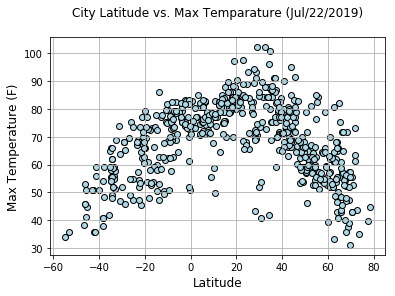

In [99]:
font = 12
lat = city_weather_df['Lat']
max_temp = city_weather_df['Max Temp(F)']
date = city_weather_df['Date'][0]

# Print analysis
print ("Minimum Temprature is {:.2f}" .format(max_temp.min()))
print ("Average Temprature is {:.2f}" .format(max_temp.mean()))
print ("Maximun Temprature is {:.2f}" .format (max_temp.max()))  
print ("Their are {} cities temprature are greater than 100 degree (F) \n" .format (city_weather_df[city_weather_df['Max Temp(F)']> 100].count()['City']))
 


plt.grid(True)
# create scatter plot for city latitude with max temprature
plt.scatter(lat, max_temp, marker="o", facecolors="lightblue", edgecolors="black")
# set x axis label
plt.xlabel("Latitude", fontsize = font)
# set y axis label
plt.ylabel("Max Temperature (F)", fontsize = font)
# set chart title 
plt.title(f"City Latitude vs. Max Temparature ({date})\n", fontsize = font)
#  save png images to output folder
plt.savefig("output_data/max_temp.png")
plt.show()

#### Latitude vs. Humidity Plot

Maximum Humidity 100.00 %
Minimum Humidity 9.00 %
Average Humidity 72.80 %


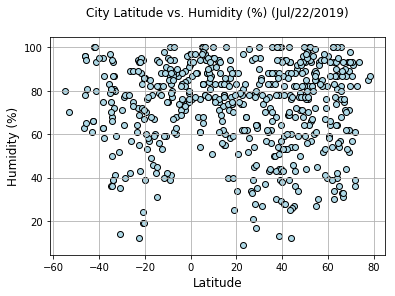

In [105]:
font = 12
lat = city_weather_df['Lat']
humidity = city_weather_df['Humidity(%)']
date = city_weather_df['Date'][1]

# Print analysis
print ("Maximum Humidity {:.2f} %".format(humidity.max()))
print ("Minimum Humidity {:.2f} %".format(humidity.min()))
print ("Average Humidity {:.2f} %".format(humidity.mean()))

plt.grid(True)
# create scatter plot for humidity by city latitude
plt.scatter(lat, humidity, marker="o", facecolors="lightblue", edgecolors="black")
# set x axis label
plt.xlabel("Latitude", fontsize = font)
# set y axis label
plt.ylabel("Humidity (%)", fontsize = font)
# set chart title 
plt.title(f"City Latitude vs. Humidity (%) ({date})\n", fontsize = font)
#  save png images to output folder
plt.savefig("output_data/lat_humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

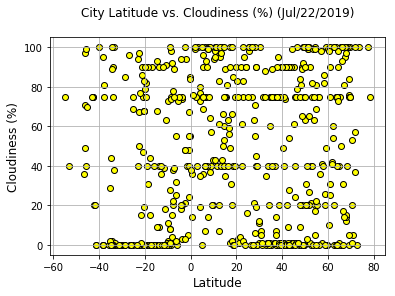

In [81]:
font = 12
lat = city_weather_df['Lat']
cloudiness = city_weather_df['Cloudiness(%)']
date = city_weather_df['Date'][1]

plt.grid(True)
# create scatter plot for cloudiness by city latitude
plt.scatter(lat, cloudiness, marker="o", facecolors="yellow", edgecolors="black")
# set x axis label
plt.xlabel("Latitude", fontsize = font)
# set y axis label
plt.ylabel("Cloudiness (%)", fontsize = font)
# set chart title 
plt.title(f"City Latitude vs. Cloudiness (%) ({date})\n", fontsize = font)
#  save png images to output folder
plt.savefig("output_data/lat_cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

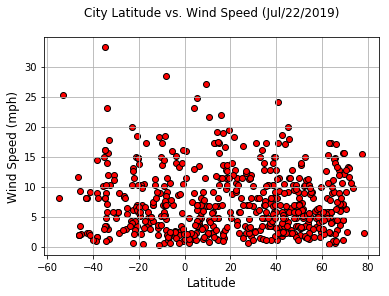

In [78]:
font = 12
lat = city_weather_df['Lat']
wind_speed = city_weather_df['Wind Speed(mph)']
date = city_weather_df['Date'][1]

plt.grid(True)
# create scatter plot for wind speed mph by city latitude
plt.scatter(lat, wind_speed, marker="o", facecolors="red", edgecolors="black")
# set x axis label
plt.xlabel("Latitude", fontsize = font)
# set y axis label
plt.ylabel("Wind Speed (mph)", fontsize = font)
# set chart title 
plt.title(f"City Latitude vs. Wind Speed ({date})\n", fontsize = font)
#  save png images to output folder
plt.savefig("output_data/lat_wind_speed.png")
plt.show()